In [1]:
import tensorflow as tf
from keras import backend as K
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import json

%matplotlib inline

Using TensorFlow backend.


In [2]:
from evaluate import *
import demo as vdsr

In [3]:
# Paths
path_model_results = "Model_Results/"
path_scaling_results = "Scaling_Results/"
path_images = "Images/"

# TO BE IMPORTED FROM INDIVIDUAL MODEL SCRIPTS
def bogus(x,y=None):
    return x

import random
def bogus1(x,y=None):
    return (random.random()*20)

# Models and predict functions
models = {
    'vdsr' : vdsr.predict,
    'vdsr1' : vdsr.predict
}

# Function Definition:
# Arguments : LR
# Return Type : SR
# LR and SR are RGB images


# Metrics evaluated for each model
metrics = {
    'psnr' : psnr,
    'ssim' : ssim,
    'mse' : mse,
    'uqi' : uqi
}

# Function Definition:
# Arguments : SR, HR
# Return Type : float
# SR and HR are RGB images


# Image names used for comparison
images = ['image1','image2','image3']

scaling_factor = 4
scaling_factors = [2, 4, 8]
scaling_model = 'vdsr'

hr_dim = [512,512]

## Model Plots

In [4]:
# Loading evaluated results from available JSON files
path = path_model_results
model_results = {}

for model in models:
    file_name = path + model + ".json"
    try:
        with open(file_name, 'r') as file:
            model_results[model] = json.load(file)
    except:
        print("Failed Loading JSON:", file_name)

list(model_results.keys())

['vdsr', 'vdsr1']

In [5]:
def get_metric_values(images, metric, model):
    return [model_results[model][im][metric] for im in images]

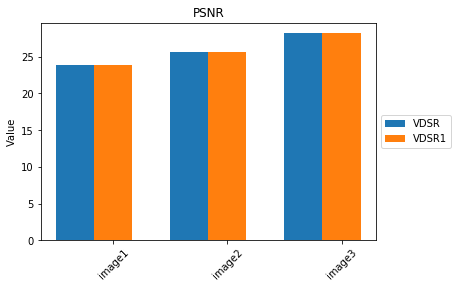

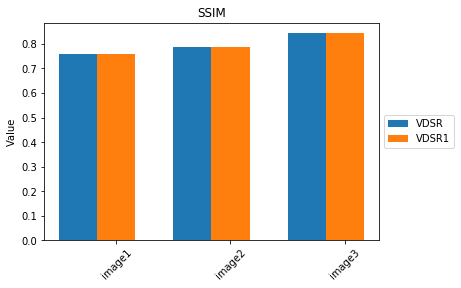

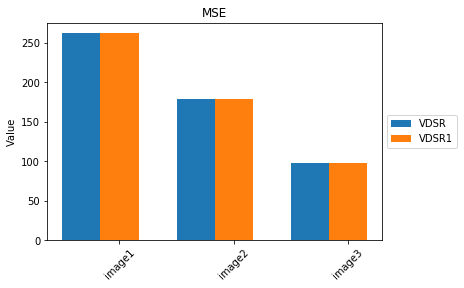

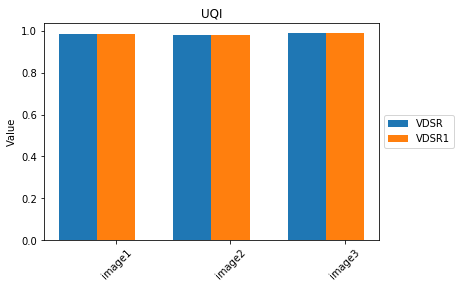

In [6]:
plot_metrics = metrics.keys()
plot_images = images
plot_models = models.keys()

# necessary variables
width = 1/(len(plot_models)+1)
ind = np.arange(len(plot_images))

for plot_metric in plot_metrics:
    fig = plt.figure(1)
    sub = fig.add_subplot(111)

    # the bars
    rects = []
    for index, model in enumerate(plot_models):
        rects.append(
            sub.bar(
                ind + index*width, 
                get_metric_values(plot_images, plot_metric, model), 
                width
            )
        )

    # axes and labels
    sub.set_ylabel('Value')
    sub.set_title(plot_metric.upper())
    sub.set_xticks(ind+width)
    plt.setp(sub.set_xticklabels(plot_images), rotation=45, fontsize=10)

    # legend
    sub.legend([r[0] for r in rects], [m.upper() for m in plot_models], 
               loc='center left', bbox_to_anchor=(1.0, 0.5))

    plt.show()

## Scaling Factor Plots

In [7]:
# Loading evaluated results from available JSON files
path = path_scaling_results
scaling_results = {}

for image in images:
    file_name = path + image + ".json"
    try:
        with open(file_name, 'r') as file:
            scaling_results[image] = json.load(file)
    except:
        print("Failed Loading JSON:", file_name)

list(scaling_results.keys())

['image1', 'image2', 'image3']

In [8]:
def get_scale_values(scales, image, metric):
    return [scaling_results[image][str(sc)][metric] for sc in scales]

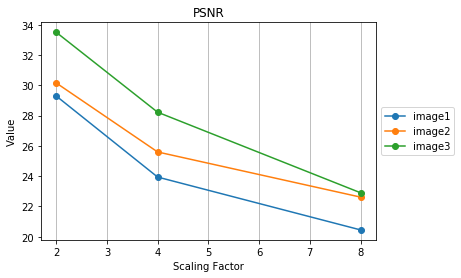

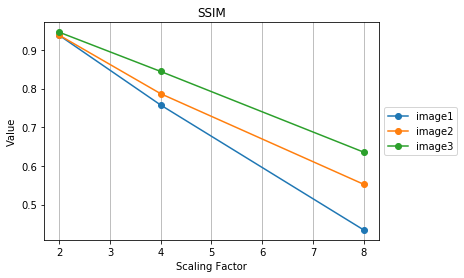

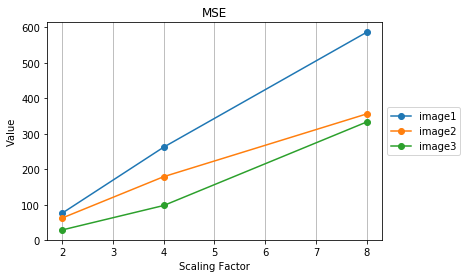

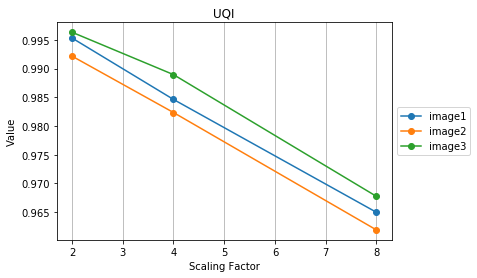

In [9]:
plot_model = scaling_model
plot_images = images
plot_metrics = metrics.keys()
plot_scales = scaling_factors

for plot_metric in plot_metrics:
    fig = plt.figure(1)
    sub = fig.add_subplot(111)

    for im in plot_images:
        sub.plot(plot_scales, get_scale_values(plot_scales, im, plot_metric), '-o', label=im)

    # axes and labels
    sub.set_title(plot_metric.upper())
    sub.set_xlabel('Scaling Factor')
    sub.set_ylabel('Value')
    sub.xaxis.grid()

    # legend
    sub.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    plt.show()